# Import data

In [ ]:
import zipfile
import tensorflow as tf

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-03-12 13:31:02--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.47M  96.2MB/s    in 1.1s    

2022-03-12 13:31:04 (96.2 MB/s) - ‘pizza_steak.zip.2’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/test/steak

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:
import os 
num_images = len(os.listdir("pizza_steak/test/steak"))
num_images

250

In [ ]:
import pathlib
import numpy as np 
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img
  

  







Image shape: (384, 512, 3)


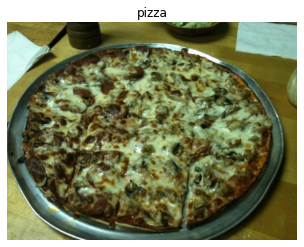

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img.shape

(512, 512, 3)

Unfinished


In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,
                        epochs=1,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))




Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


'model_1 = tf.keras.models.Sequential([\n                                      tf.keras.layers.Conv2D(filters=10,\n                                                             kernel_size=3,\n                                                             activation="relu",\n                                                             input_shape=(224,224,3)),\n                                      tf.keras.layers.Conv2D(10,3, activation="relu"),\n                                      tf.keras.layers.MaxPool2D(pool_size=2,\n                                                                padding="valid"),\n                                      tf.keras.layers.Conv2D(10,3, activation="relu"),\n                                      tf.keras.layers.Conv2D(10,3, activation="relu"),\n                                      tf.keras.layers.MaxPool2D(2),\n                                      tf.keras.layers.Flatten(),\n                                      tf.keras.layers.Dense(1, activation="sigm

In [ ]:

model_1.save('model_1.h5') 

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(224,224,3 )),
                               tf.keras.layers.Dense(1000, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(100, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=15,
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/15
47/47 [==============================] - 14s 286ms/step - loss: 5.1758 - accuracy: 0.6167 - val_loss: 1.3462 - val_accuracy: 0.6820
Epoch 2/15
47/47 [==============================] - 9s 185ms/step - loss: 1.0420 - accuracy: 0.7000 - val_loss: 1.2439 - val_accuracy: 0.6300
Epoch 3/15
47/47 [==============================] - 10s 207ms/step - loss: 1.0243 - accuracy: 0.6807 - val_loss: 0.8922 - val_accuracy: 0.6680
Epoch 4/15
47/47 [==============================] - 12s 262ms/step - loss: 0.7538 - accuracy: 0.7133 - val_loss: 0.4867 - val_accuracy: 0.7920
Epoch 5/15
47/47 [==============================] - 9s 187ms/step - loss: 0.6175 - accuracy: 0.7447 - val_loss: 0.6779 - val_accuracy: 0.7240
Epoch 6/15
47/47 [==============================] - 9s 193ms/step - loss: 0.5742 - accuracy: 0.7587 - val_loss: 0.4683 - val_accuracy: 0.7980
Epoch 7/15
47/47 [==============================] - 9s 186ms/step - loss: 0.5855 - accuracy: 0.7633 - val_loss: 0.5492 - val_accuracy: 0.7440
Epo

In [ ]:
model_2.save('model_2.h5') 

Image shape: (509, 512, 3)
Image shape: (512, 512, 3)


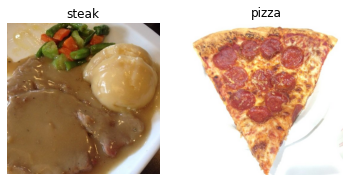

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Epoch 1/15
47/47 [==============================] - 9s 182ms/step - loss: 2.7540 - accuracy: 0.5273 - val_loss: 0.7316 - val_accuracy: 0.6580
Epoch 2/15
47/47 [==============================] - 8s 176ms/step - loss: 0.6011 - accuracy: 0.7207 - val_loss: 0.5815 - val_accuracy: 0.7080
Epoch 3/15
47/47 [==============================] - 8s 175ms/step - loss: 0.5683 - accuracy: 0.7227 - val_loss: 0.6389 - val_accuracy: 0.6800
Epoch 4/15
47/47 [==============================] - 8s 177ms/step - loss: 0.5165 - accuracy: 0.7600 - val_loss: 0.7069 - val_accuracy: 0.6200
Epoch 5/15
47/47 [==============================] - 8s 174ms/step - loss: 0.5272 - accuracy: 0.7547 - val_loss: 0.5748 - val_accuracy: 0.6880
Epoch 6/15
47/47 [==============================] - 8s 176ms/step - loss: 0.4978 - accuracy: 0.7707 - val_loss: 0.4654 - val_accuracy: 0.7680
Epoch 7/15
47/47 [==============================] - 8s 175ms/step - loss: 0.4383 - accuracy: 0.8047 - val_loss: 0.4425 - val_accuracy: 0.7880
Epoch 

In [ ]:
model_3.save('model_3.h5') 

In [ ]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 150528)            0         
                                                                 
 dense_21 (Dense)            (None, 100)               15052900  
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 1)                

### Visualize the data

Image shape: (512, 512, 3)
Image shape: (512, 384, 3)


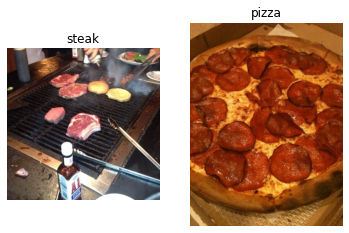

In [ ]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# Preproses the data


In [ ]:
train_dir = "pizza_steak/train/"
test_dir = 'pizza_steak/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/225.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               batch_size=32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images ,labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
#images[:2], 
labels[:2]

array([0., 1.], dtype=float32)

In [ ]:
images.shape

(32, 224, 224, 3)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = tf.keras.Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224,224,3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
len(train_data), len(test_data)

In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))
 


Epoch 1/15
47/47 [==============================] - 10s 196ms/step - loss: 0.6686 - accuracy: 0.7107 - val_loss: 0.4282 - val_accuracy: 0.8060
Epoch 2/15
47/47 [==============================] - 9s 189ms/step - loss: 0.4414 - accuracy: 0.7960 - val_loss: 0.3927 - val_accuracy: 0.8200
Epoch 3/15
47/47 [==============================] - 9s 188ms/step - loss: 0.3706 - accuracy: 0.8407 - val_loss: 0.3812 - val_accuracy: 0.8260
Epoch 4/15
47/47 [==============================] - 9s 188ms/step - loss: 0.2428 - accuracy: 0.9087 - val_loss: 0.3926 - val_accuracy: 0.8140
Epoch 5/15
47/47 [==============================] - 9s 188ms/step - loss: 0.1439 - accuracy: 0.9473 - val_loss: 0.4788 - val_accuracy: 0.7780
Epoch 6/15
47/47 [==============================] - 9s 189ms/step - loss: 0.0653 - accuracy: 0.9840 - val_loss: 0.4505 - val_accuracy: 0.8340
Epoch 7/15
47/47 [==============================] - 9s 188ms/step - loss: 0.0251 - accuracy: 0.9947 - val_loss: 0.7415 - val_accuracy: 0.7880
Epoch

In [ ]:
model_4.save('model_4.h5')

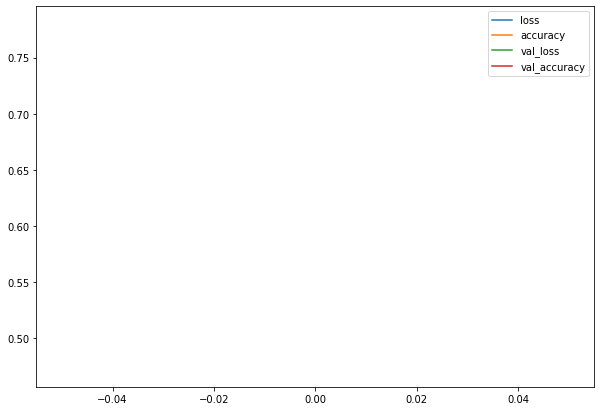

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
def plot_loss_curves(history):


  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

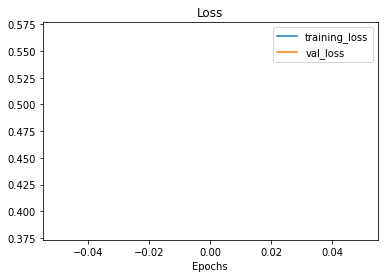

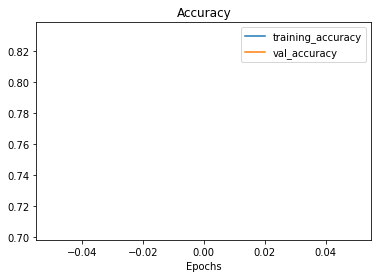

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_19 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_20 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_9 (Flatten)         (None, 475240)            0         
                                                                 
 dense_27 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_5 = Sequential([
                      Conv2D(10,3, activation='relu', input_shape=(224,224,3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10,3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")



])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))



Epoch 1/15
47/47 [==============================] - 9s 183ms/step - loss: 0.6534 - accuracy: 0.5900 - val_loss: 0.5595 - val_accuracy: 0.7040
Epoch 2/15
47/47 [==============================] - 8s 180ms/step - loss: 0.5106 - accuracy: 0.7520 - val_loss: 0.3958 - val_accuracy: 0.8540
Epoch 3/15
47/47 [==============================] - 8s 180ms/step - loss: 0.4471 - accuracy: 0.8047 - val_loss: 0.3507 - val_accuracy: 0.8660
Epoch 4/15
47/47 [==============================] - 9s 183ms/step - loss: 0.4084 - accuracy: 0.8167 - val_loss: 0.3431 - val_accuracy: 0.8600
Epoch 5/15
47/47 [==============================] - 8s 179ms/step - loss: 0.3956 - accuracy: 0.8207 - val_loss: 0.3238 - val_accuracy: 0.8540
Epoch 6/15
47/47 [==============================] - 9s 182ms/step - loss: 0.3649 - accuracy: 0.8473 - val_loss: 0.3577 - val_accuracy: 0.8460
Epoch 7/15
47/47 [==============================] - 8s 179ms/step - loss: 0.3547 - accuracy: 0.8493 - val_loss: 0.3188 - val_accuracy: 0.8720
Epoch 

In [ ]:
model_5.save('model_5.h5') 

In [ ]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 26, 26, 10)     

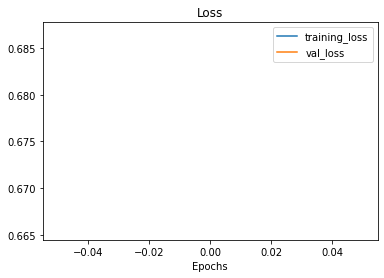

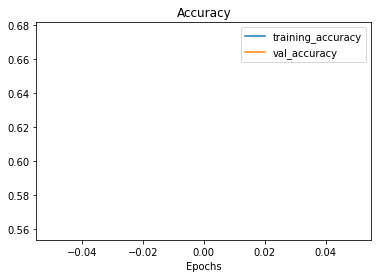

In [ ]:
plot_loss_curves(history_5)

In [ ]:
#all in one pack,Run above the model cell
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import tensorflow as tf

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

 
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"


train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

print("augmented training images")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode='categorical',
                                                                      shuffle=True)

print("training images")
train_data = train_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True)


print("test images")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True)

def plot_loss_curves(history):


  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

--2022-03-20 16:53:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 142.250.152.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   104MB/s    in 1.0s    

2022-03-20 16:53:25 (104 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]

['pizza' 'steak']
augmented training images
Found 1500 images belonging to 2 classes.
training images
Found 500 images belonging to 2 classes.
test images
Found 500 images belonging to 2 classes.


In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)




model_6 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=128,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(64,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(32,3, activation="relu"),
                                      tf.keras.layers.Conv2D(10,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=15,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/15


In [ ]:
model_6.save('model_6.h5') 

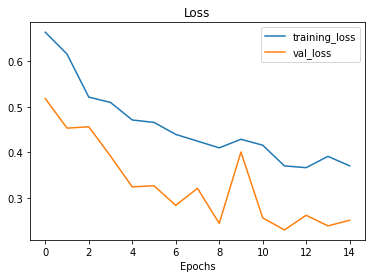

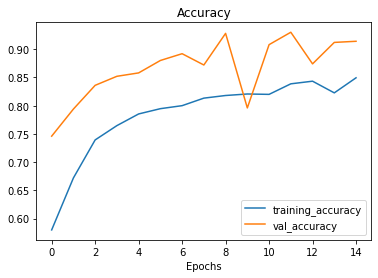

In [ ]:
plot_loss_curves(history_6)

In [ ]:
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 128)     3584      
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 64)      73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 32)      18464     
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      2890      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
import matplotlib.image as mpimg

steak = mpimg.imread("steak.jpg")



In [ ]:
steak.shape

(194, 259, 3)

In [ ]:
steak 

array([[[ 84,  75,  34],
        [ 72,  63,  22],
        [ 58,  46,   6],
        ...,
        [ 90,  72,  52],
        [ 90,  72,  52],
        [ 90,  72,  52]],

       [[154, 149, 109],
        [ 58,  50,  13],
        [ 69,  59,  23],
        ...,
        [ 86,  68,  48],
        [ 86,  68,  48],
        [ 86,  68,  48]],

       [[196, 196, 162],
        [124, 121,  88],
        [ 61,  57,  22],
        ...,
        [ 83,  65,  45],
        [ 83,  65,  45],
        [ 83,  65,  45]],

       ...,

       [[184, 195, 201],
        [184, 195, 201],
        [184, 195, 201],
        ...,
        [137,  85,  38],
        [114,  62,  15],
        [ 99,  47,   0]],

       [[184, 192, 195],
        [184, 192, 195],
        [184, 192, 195],
        ...,
        [131,  65,   4],
        [144,  78,  17],
        [126,  60,   0]],

       [[184, 192, 195],
        [184, 192, 195],
        [184, 192, 195],
        ...,
        [164,  98,  37],
        [177, 111,  50],
        [159,  93,  32]]

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  
  

  img = tf.io.read_file(filename)
  
  img = tf.image.decode_image(img, channels=3) 
  
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.

  return tf.expand_dims(img, axis=0)



In [ ]:
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
steak = load_and_prep_image("steak.jpg")
steak

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.32181373, 0.29436275, 0.12965687],
         [0.26648283, 0.23443627, 0.07340686],
         [0.25808823, 0.20796569, 0.06047794],
         ...,
         [0.35447302, 0.27469364, 0.18229167],
         [0.34993872, 0.28235295, 0.20208333],
         [0.34901962, 0.28235295, 0.20392157]],

        [[0.5172326 , 0.49893808, 0.3467672 ],
         [0.23470461, 0.21039452, 0.05969669],
         [0.27282667, 0.23156677, 0.08843689],
         ...,
         [0.34247664, 0.26269722, 0.17029527],
         [0.33426994, 0.26668417, 0.18641455],
         [0.33335084, 0.26668417, 0.18825279]],

        [[0.68321484, 0.68026495, 0.54167956],
         [0.354249  , 0.3449265 , 0.20603743],
         [0.2541962 , 0.2271881 , 0.09037087],
         ...,
         [0.33163515, 0.25185573, 0.15627462],
         [0.32250524, 0.25691664, 0.16943277],
         [0.32158613, 0.257528  , 0.17127101]],

        ...,

        [[0.71853507, 0.76107335, 

In [ ]:
steak.shape

TensorShape([1, 224, 224, 3])

In [ ]:
pred = model_2.predict(steak)
pred

array([[0.95479965]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(img)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(tf.squeeze(img))
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

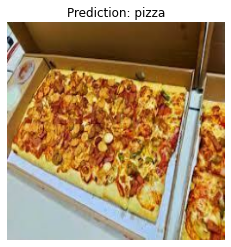

In [ ]:
 pred_and_plot(model_6, 'steak.jpg', class_names)

# Food Image Full!

In [ ]:
# all in one pack,Run above the model cell
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
import os
import pathlib
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

!wget !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

def view_random_image(target_dir, target_class):

  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)
  
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img


train_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")


 
def plot_loss_curves(history):


  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


def load_and_prep_image(filename, img_shape=224):
  
  

  img = tf.io.read_file(filename)
  
  img = tf.image.decode_image(img, channels=3) 
  
  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.

  return tf.expand_dims(img, axis=0)


def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(img)

  # Get the predicted class
  pred_class = class_names[pred.argmax()]

  # Plot the image and predicted class
  plt.imshow(tf.squeeze(img))
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);







In [ ]:
import datetime 
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_s/feature_vector/2"

In [ ]:
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32
def create_model(model_url, num_classes=10):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))
  
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation="softmax", name='output_layer')
  ])
  
  return model

In [ ]:
efficientnet_model = create_model(efficientnet_url, num_classes=train_data_augmented.num_classes)

efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [ ]:
efficientnet_history = efficientnet_model.fit(train_data_augmented,
                                  epochs=10,
                                  steps_per_epoch=len(train_data_augmented),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  callbacks=[create_tensorboard_callback(dir_name='tensorflow_hub',
                                                                         experiment_name="efficientnetB0")])


Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20220316-185610
Epoch 1/10
235/235 [==============================] - 148s 580ms/step - loss: 0.9461 - accuracy: 0.7267 - val_loss: 0.4296 - val_accuracy: 0.8784
Epoch 2/10
235/235 [==============================] - 134s 570ms/step - loss: 0.5569 - accuracy: 0.8315 - val_loss: 0.3487 - val_accuracy: 0.8960
Epoch 3/10
235/235 [==============================] - 136s 580ms/step - loss: 0.4826 - accuracy: 0.8515 - val_loss: 0.3235 - val_accuracy: 0.8984
Epoch 4/10
235/235 [==============================] - 135s 574ms/step - loss: 0.4328 - accuracy: 0.8623 - val_loss: 0.3032 - val_accuracy: 0.9028
Epoch 5/10
235/235 [==============================] - 132s 563ms/step - loss: 0.4112 - accuracy: 0.8724 - val_loss: 0.2892 - val_accuracy: 0.9084
Epoch 6/10
235/235 [==============================] - 135s 573ms/step - loss: 0.3843 - accuracy: 0.8793 - val_loss: 0.2842 - val_accuracy: 0.9084
Epoch 7/10
235/235 [=========================

In [ ]:
len(test_data)

79

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/train'
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'
There are 1

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


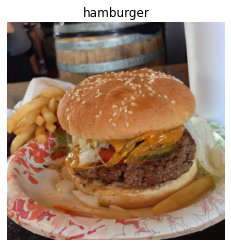

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) 

In [ ]:

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_7 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=128,
                                                             kernel_size=3,
                                                             activation="relu",
                                                             input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(64,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,
                                                                padding="valid"),
                                      tf.keras.layers.Conv2D(32,3, activation="relu"),
                                      tf.keras.layers.Conv2D(16,3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(10, activation="softmax")
])

model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

In [ ]:
history_7 =  model_7.fit(train_data_augmented,
                          epochs=3,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[lr_scheduler])

Epoch 1/5
235/235 [==============================] - 168s 710ms/step - loss: 2.2446 - accuracy: 0.1497 - val_loss: 2.1658 - val_accuracy: 0.2012
Epoch 2/5
235/235 [==============================] - 165s 701ms/step - loss: 2.1498 - accuracy: 0.2136 - val_loss: 2.0105 - val_accuracy: 0.2684
Epoch 3/5
235/235 [==============================] - 164s 698ms/step - loss: 2.0666 - accuracy: 0.2657 - val_loss: 1.8862 - val_accuracy: 0.3372
Epoch 4/5
235/235 [==============================] - 165s 700ms/step - loss: 1.9902 - accuracy: 0.3019 - val_loss: 1.9065 - val_accuracy: 0.3172
Epoch 5/5
235/235 [==============================] - 164s 696ms/step - loss: 1.9436 - accuracy: 0.3231 - val_loss: 1.8360 - val_accuracy: 0.3524


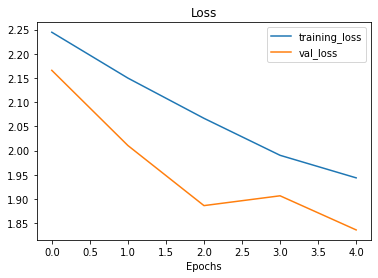

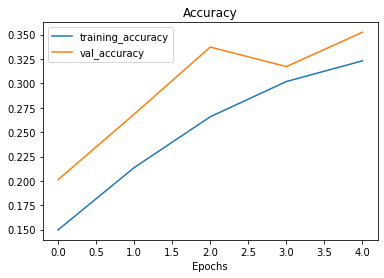

In [ ]:
plot_loss_curves(history_7)

In [ ]:
model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
pred

array([[0.11085521, 0.19154668, 0.01972117, 0.14676309, 0.03675911,
        0.07745558, 0.17623673, 0.00938298, 0.1393043 , 0.09197517]],
      dtype=float32)

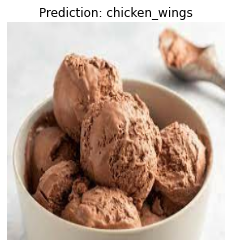

In [ ]:
pred_and_plot(model=model_7,
              filename="pred.jpg",
              class_names=class_names)

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

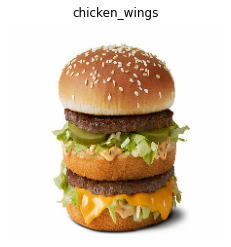

In [ ]:
img = load_and_prep_image("pred.jpg")

# Make a prediction
pred = model_7.predict(img)

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(tf.squeeze(img))
plt.title(pred_class)
plt.axis(False);

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(img)

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(tf.squeeze(img))
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

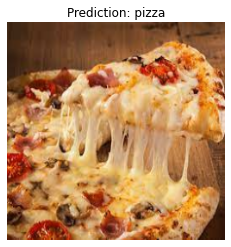

In [ ]:
pred_and_plot(efficientnet_model, "download.jpg", class_names)

In [ ]:
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

NameError: ignored